# MountainCar - v0 ÌôòÍ≤Ω Íµ¨Ï∂ïÌïòÍ∏∞ 

In [ ]:
!pip install gym pyvirtualdisplay
!apt-get install -y xvfb python-opengl ffmpeg

!apt-get update
!apt-get install cmake
!pip install --upgrade setuptools
!pip install ez_setup
!pip install gym[atari]

!pip install box2d-py
!pip install gym[Box_2D]

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-opengl is already the newest version (3.1.0+dfsg-1).
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
xvfb is already the newest version (2:1.19.6-1ubuntu4.4).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 60 not upgraded.
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:4 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_

In [ ]:
import gym
import random
import tensorflow as tf
import numpy as np

#ÌôòÍ≤Ω Íµ¨Ï∂ï 
env = gym.make('MountainCar-v0')

# ÌôòÍ≤ΩÏùò Í¥ÄÏ∞∞ Í≥µÍ∞Ñ, ÌñâÎèô Í≥µÍ∞Ñ Î≥ÄÏàò ÌôïÏù∏ 

In [ ]:
print(env.observation_space)
print(env.observation_space.low)
print(env.observation_space.high)
print()
print(env.action_space)
print()
print(env._max_episode_steps)

Box(2,)
[-1.2  -0.07]
[0.6  0.07]

Discrete(3)

200


# Î¨¥ÏûëÏúÑÎ°ú ÏàòÌñâÌïú ÏóêÏù¥Ï†ÑÌä∏

In [ ]:
step = 0
score = 0
env.reset()

while True:
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    print(score)
    score += reward
    step += 1
    
    if done:
        break

print('score:', score)
print('step:', step)
print(env.observation_space.sample())

0
-1.0
-2.0
-3.0
-4.0
-5.0
-6.0
-7.0
-8.0
-9.0
-10.0
-11.0
-12.0
-13.0
-14.0
-15.0
-16.0
-17.0
-18.0
-19.0
-20.0
-21.0
-22.0
-23.0
-24.0
-25.0
-26.0
-27.0
-28.0
-29.0
-30.0
-31.0
-32.0
-33.0
-34.0
-35.0
-36.0
-37.0
-38.0
-39.0
-40.0
-41.0
-42.0
-43.0
-44.0
-45.0
-46.0
-47.0
-48.0
-49.0
-50.0
-51.0
-52.0
-53.0
-54.0
-55.0
-56.0
-57.0
-58.0
-59.0
-60.0
-61.0
-62.0
-63.0
-64.0
-65.0
-66.0
-67.0
-68.0
-69.0
-70.0
-71.0
-72.0
-73.0
-74.0
-75.0
-76.0
-77.0
-78.0
-79.0
-80.0
-81.0
-82.0
-83.0
-84.0
-85.0
-86.0
-87.0
-88.0
-89.0
-90.0
-91.0
-92.0
-93.0
-94.0
-95.0
-96.0
-97.0
-98.0
-99.0
-100.0
-101.0
-102.0
-103.0
-104.0
-105.0
-106.0
-107.0
-108.0
-109.0
-110.0
-111.0
-112.0
-113.0
-114.0
-115.0
-116.0
-117.0
-118.0
-119.0
-120.0
-121.0
-122.0
-123.0
-124.0
-125.0
-126.0
-127.0
-128.0
-129.0
-130.0
-131.0
-132.0
-133.0
-134.0
-135.0
-136.0
-137.0
-138.0
-139.0
-140.0
-141.0
-142.0
-143.0
-144.0
-145.0
-146.0
-147.0
-148.0
-149.0
-150.0
-151.0
-152.0
-153.0
-154.0
-155.0
-156.0
-157.0
-158.0


# ÎèôÏòÅÏÉÅ ÏàòÌñâ ÌôòÍ≤Ω ÏΩîÎìú
 * Ïù¥ÌõÑ ÏΩîÎ†ô Í∞ÄÏÉÅÌôòÍ≤ΩÏóê video Ìè¥ÎçîÏôÄ Ìï®Íªò ÏÉùÏÑ± 

In [ ]:
#ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) 
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay

# ÏòÅÏÉÅ Ï∂úÎ†• ÏÖãÌåÖ 
def show_video():
    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) > 0:
        mp4 = mp4list[0]
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
    else: 
        print("Could not find video")
    
def wrap_env(env):
    env = Monitor(env, './video', force=True)
    return env
  
from pyvirtualdisplay import Display

#ÏòÅÏÉÅ ÌÅ¨Í∏∞ ÏßÄÏ†ï Î∞è Ï∂úÎ†• 
display = Display(visible=0, size=(1400, 900))
display.start()

# ÎûúÎç§ ÌñâÎèô ÏóêÏù¥Ï†ÑÌä∏Ïùò ÌôòÍ≤Ω Ïã§Ìñâ Í≤∞Í≥º ÌôïÏù∏

In [ ]:
env = wrap_env(gym.make('MountainCar-v0'))
env.reset()

score = 0
step = 0
while True:
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    score += reward
    step += 1
    
    if done:
        break

print('score:', score)
print('step:', step)
env.close()
show_video()

score: -200.0
step: 200


# ÏÑ±Í≥µÏ†ÅÏù∏ ÏóêÌîºÏÜåÎìú Ï†ÄÏû•


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
-199.9108
[-186.0, -182.0, -180.0, -190.0, -176.0, -164.0, -170.0, -184.0, -194.0, -182.0, -190.0, -174.0, -188.0, -190.0, -162.0, -172.0, -184.0, -188.0, -190.0, -182.0, -176.0, -194.0, -178.0, -184.0, -190.0, -172.0, -164.0, -186.0, -170.0, -192.0, -188.0, -172.0, -170.0, -148.0, -194.0, -196.0, -184.0, -194.0, -168.0, -196.0, -188.0, -188.0, -176.0, -196.0, -174.0, -170.0, -180.0]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


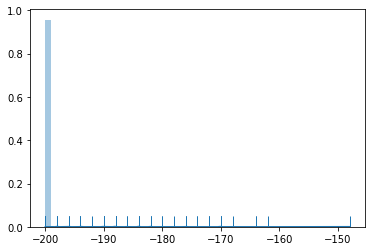

In [ ]:
# ÌôòÍ≤Ω Íµ¨Ï∂ï Î∞è ÏóêÌîºÏÜåÎìú ÏàòÌñâ ÌôòÍ≤Ω Íµ¨Ï∂ï-------------------------------------------------------------------- #    
env = gym.make('MountainCar-v0')

scores = []
training_data = []
accepted_scores = []
required_score = -198

for i in range(10000):
    if i % 100 == 0:
        print(i)
    env.reset()
    score = 0

# Î≥¥ÏÉÅ Í∏∞Ï§Ä Ï†ïÏ†ï Î∞è ÏßÑÏûêÏö¥ÎèôÏùÑ ÏÑ±Í≥µÌïú Îç∞Ïù¥ÌÑ∞Î°ú 
# ÌïôÏäµÎç∞Ïù¥ÌÑ∞ Íµ¨Ï∂ï ÏΩîÎìú --------------------------------------------------------------------- #  
    game_memory = []
    previous_obs = []

    while True:
        action = env.action_space.sample()
        obs, reward, done, info = env.step(action)
        
        if len(previous_obs) > 0:
            game_memory.append([previous_obs, action])
        
        previous_obs = obs
        if obs[0] > -0.2:
            reward = 1
        
        score += reward
        
        if done:
            break
        
    scores.append(score)
    if score > required_score:
        accepted_scores.append(score)
        for data in game_memory:
            training_data.append(data)

scores = np.array(scores)
print(scores.mean())
print(accepted_scores)

# ÏãúÍ∞ÅÌôî ÏΩîÎìú ------------------------------------------------------------ #  

import seaborn as sns
sns.distplot(scores, rug=True)

In [ ]:
training_data[:5]

[[array([-0.59445009,  0.00153867]), 0],
 [array([-0.59338403,  0.00106606]), 0],
 [array([-5.92798399e-01,  5.85634402e-04]), 1],
 [array([-0.59169749,  0.00110091]), 2],
 [array([-0.58908938,  0.00260811]), 2]]

#Í¥ÄÏ∞∞ ÏÉÅÌÉú(x)ÏôÄ ÌñâÎèô(y)ÏùÑ ÌÜµÌïú ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ± 
 * reshapeÌï®ÏàòÎ•º ÌôúÏö©ÌïòÏó¨ Ï†ïÎ¶¨ 

In [ ]:
train_X = np.array([i[0] for i in training_data]).reshape(-1, 2)
train_Y = np.array([i[1] for i in training_data]).reshape(-1, 1)
print(train_X.shape)
print(train_Y.shape)

(9353, 2)
(9353, 1)


# Î∂ÑÎ•òÎ•º ÏúÑÌïú Ïã†Í≤ΩÎßù Ï†ïÏùò
 * ÎßàÏßÄÎßâ Í≥ÑÏ∏µÏùò units Í∞íÏùÄ Î™áÍ∞úÏùò ÏõÄÏßÅÏûÑÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÎÉêÏóê Îî∞Îùº ÏàòÏ†ï 

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# ÌïôÏäµ ÏàòÌñâ 

In [ ]:
history = model.fit(train_X, train_Y, epochs=30, batch_size=16, validation_split=0.25)

Epoch 1/30
439/439 [==============================] - 1s 3ms/step - loss: 1.0983 - accuracy: 0.3510 - val_loss: 1.0961 - val_accuracy: 0.3792
Epoch 2/30
439/439 [==============================] - 1s 3ms/step - loss: 1.0961 - accuracy: 0.3656 - val_loss: 1.0959 - val_accuracy: 0.3690
Epoch 3/30
439/439 [==============================] - 1s 3ms/step - loss: 1.0938 - accuracy: 0.3735 - val_loss: 1.0905 - val_accuracy: 0.3955
Epoch 4/30
439/439 [==============================] - 1s 3ms/step - loss: 1.0897 - accuracy: 0.3834 - val_loss: 1.0974 - val_accuracy: 0.3668
Epoch 5/30
439/439 [==============================] - 1s 3ms/step - loss: 1.0882 - accuracy: 0.3925 - val_loss: 1.0876 - val_accuracy: 0.4002
Epoch 6/30
439/439 [==============================] - 1s 3ms/step - loss: 1.0861 - accuracy: 0.4012 - val_loss: 1.0874 - val_accuracy: 0.3882
Epoch 7/30
439/439 [==============================] - 1s 3ms/step - loss: 1.0862 - accuracy: 0.3964 - val_loss: 1.0850 - val_accuracy: 0.3968
Epoch 

# ÌïôÏäµÍ≤∞Í≥º ÏãúÍ∞ÅÌôî

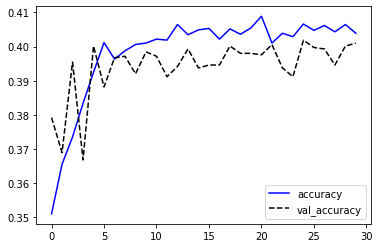

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], 'b-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.legend()
plt.show()

# Î∂ÑÎ•ò Ïã†Í≤ΩÎßùÏùÑ ÌôúÏö©Ìïú ÏóêÏù¥Ï†ÑÌä∏ ÌñâÎèô ÌôïÏù∏ (ÏãúÍ∞Ñ ÏÜåÎ™® ‚Üë)

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

scores = []
steps = []
actions = []

for i in range(500):
    if i % 10 == 0:
        print(i)
    score = 0
    step = 0
    previous_obs = []
    env.reset()

    while True:
        if len(previous_obs) == 0:
            action = env.action_space.sample()
        #Ïã†Í≤ΩÎßù ÏòàÏ∏°ÏùÑ ÌÜµÌïú Í∞íÏùÑ Î∞îÌÉïÏúºÎ°ú ÏõÄÏßÅÏûÑ Ï±ÑÌÉù
        else:
            logit = model.predict(np.expand_dims(previous_obs, axis=0))[0]
            action = np.argmax(logit)
            actions.append(action)
        
        obs, reward, done, info = env.step(action)
        previous_obs = obs
        score += reward
        step += 1

        if done:
            break
    
    scores.append(score)
    steps.append(step)

0
100
200
300
400


# socre, step Î∂ÑÌè¨ ÌôïÏù∏ 

-125.436


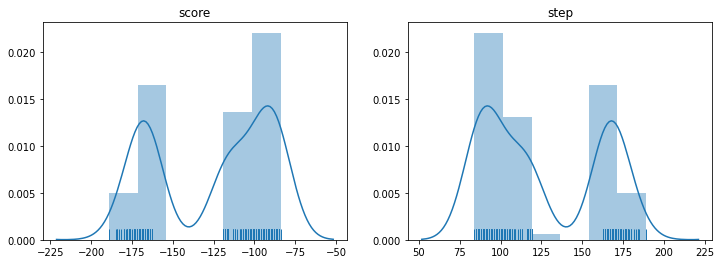

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].set_title('score')
ax[1].set_title('step')
sns.distplot(scores, rug=True, ax=ax[0])
sns.distplot(steps, rug=True, ax=ax[1])

print(np.mean(scores))

# ÌñâÎèô Î∂ÑÌè¨ ÌôïÏù∏ 

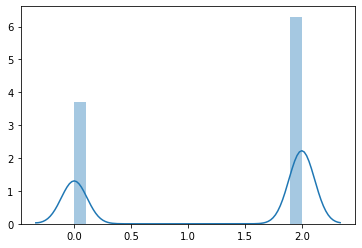

In [ ]:
sns.distplot(actions)

# Ïã†Í≤ΩÎßùÏùÑ ÌÜµÌï¥ ÌïôÏäµÌïú ÏûêÎèôÏ∞® ÏòÅÏÉÅ

In [ ]:
env.close()
env = wrap_env(gym.make('MountainCar-v0'))
env.reset()

score = 0
step = 0
previous_obs = []
while True:
    if len(previous_obs) == 0:
        action = env.action_space.sample()
    else:
        logit = model.predict(np.expand_dims(previous_obs, axis=0))[0]
        action = np.argmax(logit)
    
    obs, reward, done, info = env.step(action)
    previous_obs = obs
    score += reward
    step += 1
    
    if done:
        break

print('score:', score)
print('step:', step)
env.close()
show_video()

score: -84.0
step: 84


# ÌÅê Îü¨Îãù
 * Ïö∞ÏÑ† ÏõÄÏßÅÏûÑÏùÑ Ï†ïÏàòÍ∞Ä ÏïÑÎãå Ïã§ÏàòÎ°ú Ï†ÑÌôòÌñàÏùÑ ÎïåÏùò Ïã§Ìóò  

In [ ]:
env = gym.make('MountainCarContinuous-v0')

print('*'*10,'ÌôòÍ≤Ω Í≥µÍ∞Ñ','*'*10)
print(env.observation_space)
print(env.observation_space.low)
print(env.observation_space.high)

print('*'*10,'ÏóêÏù¥Ï†ÑÌä∏Ïùò ÏõÄÏßÅÏûÑ','*'*10)
print(env.action_space)
print(env.action_space.low)
print(env.action_space.high)

print('*'*10,'ÏµúÎåÄ ÏàòÌñâ ÏõÄÏßÅÏûÑ','*'*10)
print(env._max_episode_steps)

********** ÌôòÍ≤Ω Í≥µÍ∞Ñ **********
Box(2,)
[-1.2  -0.07]
[0.6  0.07]
********** ÏóêÏù¥Ï†ÑÌä∏Ïùò ÏõÄÏßÅÏûÑ **********
Box(1,)
[-1.]
[1.]
********** ÏµúÎåÄ ÏàòÌñâ ÏõÄÏßÅÏûÑ **********
999


# ÎûúÎç§ ÌñâÎèô ÏóêÏù¥Ï†ÑÌä∏Ïùò ÌôòÍ≤ΩÏã§Ìñâ Í≤∞Í≥º ÌôïÏù∏ (200 Ïä§ÌÖù)
 * score : Í∞Å Ïä§ÌÖùÎßàÎã§ ÏñªÎäî Î≥¥ÏÉÅÏùÄ ÌñâÎèôÏùò Ï†úÍ≥±Ïóê 0.1ÏùÑ Í≥±ÌïúÍ∞íÏùò ÏùåÏàòÍ∞í.
   ###### (ÌÅ∞ ÌûòÏúºÎ°ú ÏõÄÏßÅÏùº ÏàòÎ°ù ÏùåÏùò Î≥¥ÏÉÅÏùÑ Îçî ÎßéÏù¥ ÏñªÍ≤åÎêòÎäî Íµ¨Ï°∞)
 * ÍπÉÎ∞úÏóê ÎèÑÎã¨ÌïòÎ©¥ +100Ï†ê
 * ÍπÉÎ∞úÏóê ÎèÑÎã¨ÌïòÏßÄ ÏïäÍ≥† ÏõÄÏßÅÏù¥ÏßÄ ÏïäÏúºÎ©¥ 0Ï†ê  

In [ ]:
env.reset()
score = 0
step = 0
    
for i in range(200):
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)

    previous_obs = obs
    score += reward
    step += 1

    if done:
        break
        
print(score, step)

-6.237137578984328 200


# ÎûúÎç§ ÌñâÎèô ÏóêÏù¥Ï†ÑÌä∏Ïùò ÌôòÍ≤ΩÏã§Ìñâ Í≤∞Í≥º ÌôïÏù∏ (999 Ïä§ÌÖù)


In [ ]:
env.reset()
score = 0
step = 0
    
while True:
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)

    previous_obs = obs
    score += reward
    step += 1

    if done:
        break
        
print(score, step)

-34.69549035056926 999


# ÎûúÎç§ ÌñâÎèôÏóêÏÑú ÏÑ±Í≥µÌïú ÏºÄÏù¥Ïä§Î•º ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î°ú Ï†ÄÏû•('Ïã§Ïàò'Ïù∏ ÏõÄÏßÅÏûÑ)
 * Î≥¥ÏÉÅ Ï≤¥Í≥ÑÎèÑ Îã§Ïãú Ï†úÎåÄÎ°ú ÏõÄÏßÅÏù¥Î©¥ 1Ï†ê Í∑∏Î†áÏßÄ Î™ªÌïòÎ©¥ -1Ï†ê 
 * Îã¨ÎùºÏßÑ Ï†êÏùÄ ÏõÄÏßÅÏûÑÏùò Í∞íÏù¥ Ï†ïÏàòÍ∞Ä ÏïÑÎãå Ïã§ÏàòÎ°ú Ï†ÑÌôò


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
-199.8496
[-180, -184, -176, -192, -180, -182, -194, -162, -188, -184, -176, -178, -192, -186, -172, -174, -182, -176, -180, -180, -152, -162, -178, -190, -174, -174, -166, -182, -170, -158, -186, -194, -158, -180, -184, -196, -172, -176, -186, -164, -188, -194, -168, -174, -158, -174, -172, -166, -194, -188, -192, -176, -194, -186, -186, -194, -160, -188, -182, -174, -180, -196, -170, -188, -188, -182, -166, -190, -176, -196, -196, -180, -184, -192, -184]


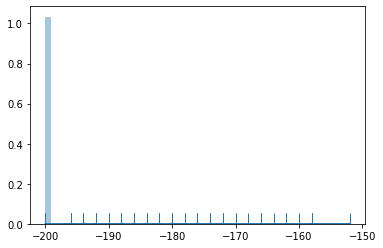

In [ ]:
scores = []
training_data = []
accepted_scores = []
required_score = -198

for i in range(10000):
    if i % 100 == 0:
        print(i)
    env.reset()
    score = 0
    game_memory = []
    previous_obs = []
    
    for i in range(200):
        action = env.action_space.sample()
        obs, reward, done, info = env.step(action)
        
        if len(previous_obs) > 0:
            game_memory.append([previous_obs, action])
        
        previous_obs = obs
        if obs[0] > -0.2:
            reward = 1
        else:
            reward = -1
        
        score += reward
        
        if done:
            break
        
    scores.append(score)
    if score > required_score:
        accepted_scores.append(score)
        for data in game_memory:
            training_data.append(data)

scores = np.array(scores)
print(scores.mean())
print(accepted_scores)

import seaborn as sns
sns.distplot(scores, rug=True)

# ÌñâÎèôÍ∞íÏù¥ 'Ïã§Ïàò'Ïù∏ Í≤ΩÏö∞Ïùò Ïã†Í≤ΩÎßù Î¨∏Ï†ú Ìï¥Í≤∞ Í≤∞Í≥º ÏòÅÏÉÅ (ÏãúÍ∞Ñ ÏÜåÎ™® ‚Üë)

In [ ]:
#ÌïôÏäµÎç∞Ïù¥ÌÑ∞ Íµ¨Ï∂ï Í≥ºÏ†ï 
train_X = np.array([i[0] for i in training_data]).reshape(-1, 2)
train_Y = np.array([i[1] for i in training_data]).reshape(-1, 1)
print(train_X.shape)
print(train_Y.shape)

#Î™®Îç∏ ÏÑ§Í≥Ñ Í≥ºÏ†ï - Î©îÏù∏ ÌôúÏÑ±ÌôîÌï®Ïàò 'Elu' 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2,), activation='elu'),
    tf.keras.layers.Dense(32, activation='elu'),
    tf.keras.layers.Dense(1, activation='linear')
])

#Ïª¥ÌååÏùº Í≥ºÏ†ï 
model.compile(optimizer=tf.optimizers.Adam(), loss='mse')

# ÌïôÏäµ 
history = model.fit(train_X, train_Y, epochs=10, validation_split=0.25)

(14925, 2)
(14925, 1)
Epoch 1/10
350/350 [==============================] - 1s 3ms/step - loss: 0.3430 - val_loss: 0.3548
Epoch 2/10
350/350 [==============================] - 1s 3ms/step - loss: 0.3399 - val_loss: 0.3426
Epoch 3/10
350/350 [==============================] - 1s 3ms/step - loss: 0.3394 - val_loss: 0.3369
Epoch 4/10
350/350 [==============================] - 1s 3ms/step - loss: 0.3383 - val_loss: 0.3384
Epoch 5/10
350/350 [==============================] - 1s 3ms/step - loss: 0.3383 - val_loss: 0.3367
Epoch 6/10
350/350 [==============================] - 1s 3ms/step - loss: 0.3378 - val_loss: 0.3367
Epoch 7/10
350/350 [==============================] - 1s 3ms/step - loss: 0.3379 - val_loss: 0.3374
Epoch 8/10
350/350 [==============================] - 1s 3ms/step - loss: 0.3374 - val_loss: 0.3374
Epoch 9/10
350/350 [==============================] - 1s 3ms/step - loss: 0.3375 - val_loss: 0.3367
Epoch 10/10
350/350 [==============================] - 1s 3ms/step - loss: 0.3

In [ ]:
# ÌïôÏäµÍ≤∞Í≥ºÎ•º ÌÜµÌïú ÏóêÏù¥Ï†ÑÌä∏Ïùò ÏõÄÏßÅÏûÑ Í≤∞Ï†ï
env.close()
env = wrap_env(gym.make('MountainCarContinuous-v0'))
env.reset()

score = 0
step = 0
previous_obs = []
while True:
    if len(previous_obs) == 0:
        action = env.action_space.sample()
    else:
        action = model.predict(np.expand_dims(previous_obs, axis=0))[0]
    
    obs, reward, done, info = env.step(action)
    previous_obs = obs
    score += reward
    step += 1
    
    if done:
        break

print('score:', score)
print('step:', step)
env.close()
show_video()

score: 99.30910876617797
step: 623


# QÎü¨ÎãùÏùÑ ÌôúÏö©Ìïú Î¨∏Ï†úÌíÄÏù¥
* QÎü¨ÎãùÏùÄ Í¥ÄÏ∞∞ ÏÉÅÌÉúÏóêÏÑú Ï∑®Ìï† Ïàò ÏûàÎäî Î™®Îì† ÌñâÎèôÏùò QÍ∞í(ÌíàÏßà)ÏùÑ ÌïôÏäµÌïòÎäî Î∞©Ïãù
* ÌäπÏ†ï ÏÉÅÌÉúÏóêÏÑú Ïñ¥Îñ§ ÌñâÎèôÏùò QÍ∞íÏù¥ Îã§Î•∏ ÌñâÎèôÎ≥¥Îã§ ÎÜíÎã§Î©¥ QÍ∞íÏù¥ ÎÜíÏùÄ ÌñâÎèôÏùÑ Ïö∞ÏÑ†Ï†ÅÏúºÎ°ú ÏÑ†ÌÉù
* QÍ∞íÏù¥ ÎÜíÏúºÎ©¥ ÏÑ†ÌÉùÎê† ÌôïÎ•† Ï¶ùÍ∞Ä
* Î™®Îì† ÏÉÅÌÉúÏóê ÎåÄÌïú Î™®Îì† ÌñâÎèôÏùò QÍ∞íÏùÑ Íµ¨ÌïòÎ©¥ ÌÖåÏù¥Î∏î ÌòïÌÉúÏùò Îç∞Ïù¥ÌÑ∞ ÌöçÎìù (Q-Table)
  * Q-Table ÌïôÏäµ Í≥ºÏ†ïÏù¥ 'Q-Learning'

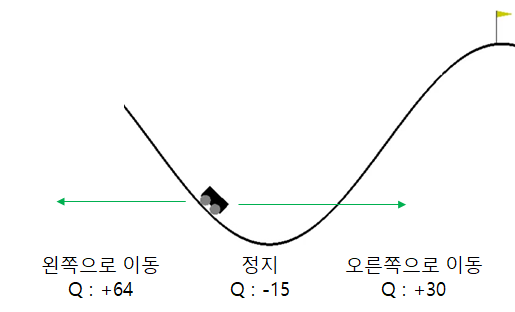

* 'Ï†ïÏàò'Ïù∏ ÏõÄÏßÅÏûÑÏùÑ Îã¥Í≥†ÏûàÎçò ÌôòÍ≤ΩÍ≥ºÎäî Îã¨Î¶¨ 'Ïã§Ïàò'Ïù∏ ÏõÄÏßÅÏûÑÏùÑ Îã¥Í≥†ÏûàÎäî ÌôòÍ≤ΩÏóêÏÑúÎäî ÌñâÎèôÍ≥µÍ∞ÑÏù¥ 
Ïó∞ÏÜçÏ†Å
* Î™®Îì† Í∞íÏóê ÎåÄÌïú QÍ∞íÏùÑ Í≥ÑÏÇ∞ÌïòÎäî Í≤ÉÏùÄ Î∂àÍ∞ÄÎä• 
* ÌñâÎèôÍ≥µÍ∞ÑÏùÑ ÏùºÏ†ïÌïú Í∞ÑÍ≤©Ïùò Í≤©ÏûêÎ°ú ÎÇòÎà†ÏÑú Ìï¥Îãπ Í≤©ÏûêÏóê ÎåÄÌïú QÍ∞íÏùÑ Í≥ÑÏÇ∞
* Í¥ÄÏ∞∞ Í≥µÍ∞ÑÎèÑ Ïó∞ÏÜçÏ†ÅÏù¥Í∏∞ ÎïåÎ¨∏Ïóê ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú Í≤©ÏûêÎ°ú ÎÇòÎà†ÏÑú Ìï¥Îãπ Í≤©ÏûêÏóê ÎåÄÌïú QÍ∞íÏùÑ Ï†ÄÏû• 

# Í¥ÄÏ∞∞ Í≥µÍ∞ÑÍ≥º ÌñâÎèô Í≥µÍ∞ÑÏùò Í≤©ÏûêÌôî 
 
- Q-Table Î≥ÄÏàòÏóê 3Ï∞®ÏõêÏùò Q-TableÏùÑ Ï†ÄÏû•. Í¥ÄÏ∞∞Í≥µÍ∞ÑÏù¥ 2Ï∞®ÏõêÏù¥Í≥†, Í∑∏ ÏïàÏóê Î™®Îì† ÌñâÎèôÏùò QÍ∞íÏùÑ ÎÑ£Ïñ¥Ïïº ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê 3Ï∞®Ïõê Q-TableÏù¥ ÎßåÎì§Ïñ¥ Ïßê
- Í¥ÄÏ∞∞ Í≥µÍ∞ÑÏùÄ 10Í∞úÏùò Í≤©ÏûêÎ°ú ÎÇòÎà¥Í≥†, ÌñâÎèôÍ≥µÍ∞ÑÏùÄ 6Í∞úÏùò Í≤©ÏûêÎ°ú ÎÇòÎàî 
  - Í∑∏Îüº Í¥ÄÏ∞∞Í≥µÍ∞ÑÏùò ÌÅ¨Í∏∞Îäî 10*10 Ï¶â 100, ÌñâÎèôÏùÄ 6Í∞úÏù¥Í∏∞ ÎïåÎ¨∏Ïóê Q-TableÏóê Ï†ÄÏû•ÎêòÎäî QÍ∞íÏùÄ Ï¥ù 600Í∞ú 

* Ï≤òÏùåÏóêÎäî Í∞Å ÌñâÎèôÏùò QÍ∞íÏù¥ Ïñ¥Îñ§ Í∞íÏù∏ÏßÄ Ïïå Ïàò ÏóÜÍ∏∞ ÎïåÎ¨∏Ïóê Ï¥àÍ∏∞Ìôî Í≥ºÏ†ï ÏàòÌñâ          
   * Í∏∞Î≥∏Í∞íÏúºÎ°úÎäî 0Í≥º ÎπÑÏä∑ÌïòÍ≥† Î¨¥ÏãúÌï† Ïàò ÏûàÏùÑ Ï†ïÎèÑÏùò ÏûëÏùÄ Í∞íÏùÑ ÎÑ£Ïñ¥Ï§çÎãàÎã§. 
   * Î™®Îëê Í∞ôÏùÄ Í∞íÏùÑ ÎÑ£Ïñ¥Ï£ºÍ∏∞ ÎïåÎ¨∏Ïóê Ï≤òÏùåÏóêÎäî ÌÅêÌÖåÏù¥Î∏îÏùÑ Ï∞∏Ï°∞Ìï¥ÎèÑ ÎûúÎç§Ìïú ÌñâÎèôÏù¥ ÏÑ†ÌÉù

* Ìï¥Îãπ ÌñâÎèôÏù¥ Ìö®Í≥ºÏ†ÅÏù¥ÏßÄ ÏïäÎã§Í≥† ÌåêÎã®ÎêòÏñ¥ QÍ∞íÏù¥ Ï°∞Í∏à Îñ®Ïñ¥ÏßÄÎ©¥ ÎÇòÎ®∏ÏßÄ qÍ∞íÏù¥ Í∑∏ÎåÄÎ°ú Ïú†ÏßÄÎêòÍ≥† ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê Îã§Î•∏ ÌñâÎèôÏúºÎ°ú ÌÉêÏÉâÌï† ÌôïÎ•†Ïù¥ Ï¶ùÍ∞Ä 
   * Ï¥àÍ∏∞ qÍ∞íÏùÑ ÎÜíÍ≤å Ï§Ñ ÏàòÎ°ù Ï≤òÏùåÏóê ÏãúÎèÑÌñàÎçò ÌñâÎèôÏù¥ Ìö®Í≥ºÏ†ÅÏù¥ÏßÄ ÏïäÏùÑ Îïå Îã§Î•∏ ÌñâÎèôÏùÑ ÌÉêÏÉâÌï¥Î≥º ÌôïÎ•†Ïù¥ ÎÜíÏïÑÏßê 

* ÌñâÎèôÏùÄ -1Í≥º 1 ÏÇ¨Ïù¥Ïùò 6Í∞ú Í∞íÏù¥ Ï∂úÎ†• 
* Ïù¥ Í∞íÏóê ÏùòÌï¥ ÏóêÏù¥Ï†ÑÌä∏Îäî Ïñ¥ÎñªÍ≤å ÏõÄÏßÅÏùºÏßÄ Í≤∞Ï†ï 

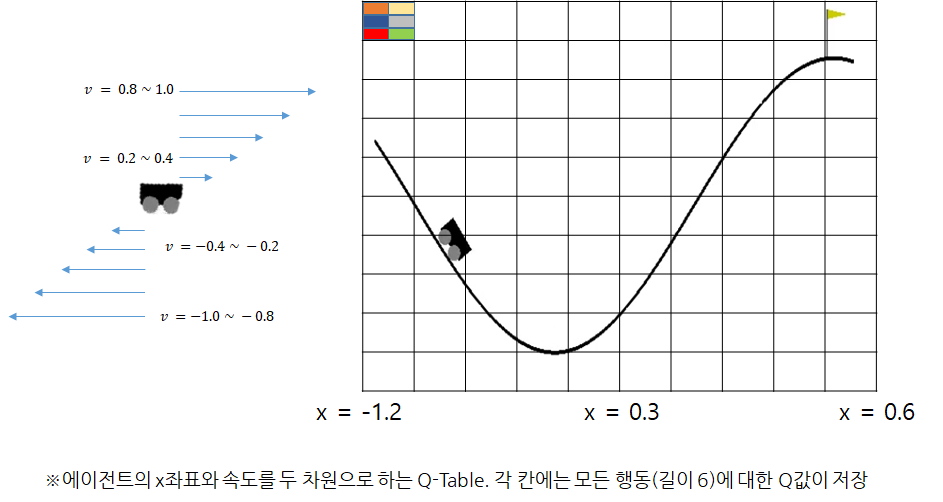

In [ ]:
state_grid_count = 10
action_grid_count = 6

q_table = []
for i in range(state_grid_count):
    q_table.append([])
    for j in range(state_grid_count):
        q_table[i].append([])
        for k in range(action_grid_count):
            q_table[i][j].append(1e-4)
            
actions = range(action_grid_count)
actions = np.array(actions).astype(float)
actions *= ((env.action_space.high - env.action_space.low) / (action_grid_count - 1))
actions += env.action_space.low

print(actions)

[-1.         -0.59999999 -0.19999999  0.20000002  0.60000002  1.00000003]


# QÎü¨ÎãùÏùÑ ÏóêÏù¥Ï†ÑÌä∏Î•º ÌïôÏäµÏãúÌÇ§Í∏∞ ÏúÑÌïú Ìï®Ïàò Ï†ïÏùò 
- obs_to_state () : Í¥ÄÏ∞∞ÏÉÅÌÉúÎ•º Í≤©ÏûêÏóê Î∞∞Îãπ
- softmax() : Í∞úÏÑ†Ïãù 

In [ ]:
import random
def obs_to_state(env, obs):
    obs = obs.flatten()
    low = env.observation_space.low
    high = env.observation_space.high
    idx = (obs - low) / (high - low) * state_grid_count
    idx = [int(x) for x in idx]
    return idx

def softmax(logits):
    exp_logits = np.exp(logits - np.max(logits))
    sum_exp_logits = np.sum(exp_logits)
    return exp_logits / sum_exp_logits

# Q-LEARNING ÏóêÏù¥Ï†ÑÌä∏ ÌïôÏäµ 
 
* Ïù¥ ÏΩîÎìúÏóêÏÑúÎäî ÌñâÎèôÏùÑ ÏÑ†ÌÉùÌï† Îïå Í∞ïÌôîÌïôÏäµÏóêÏÑú ÎÑêÎ¶¨ Ïì∞Ïù¥Îäî Î∞©Î≤ï Ï§ë ÌïòÎÇòÏù∏ Ïó°Ïã§Î°†-ÌÉêÏöï Ïù¥ÎùºÎäî Ï†ïÏ±ÖÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§. 
 * Ïó°Ïã§Î°† ÌÉêÏöï Ï†ïÏ±ÖÏùÄ Ïó°Ïã§Î°†Ïù¥ÎùºÎäî Í∞íÎ≥¥Îã§ ÎÇúÏàòÍ∞Ä ÏûëÏùÑ ÎïåÎäî ÎûúÎç§Ìïú ÌñâÎèôÏùÑ ÏÇ¨Ïö©ÌïòÍ≥†, Í∑∏Î†áÏßÄ ÏïäÏúºÎ©¥ ÏßÄÍ∏àÍπåÏßÄ 
Ï∞æÏùÄÍ≤É Ï§ëÏóêÏÑú Í∞ÄÏû• Ï¢ãÏùÄ Î∞©Î≤ïÏùÑ ÏÑ†ÌÉù. Ï¶â, Ï≤òÏùåÏóêÎäî ÌÅ∞ Í∞íÏúºÎ°ú ÏÑ§Ï†ïÌïòÍ≥† ÌïôÏäµÏùÑ ÏßÄÏÜçÌï®Ïóê Îî∞Îùº Ï†êÏ†ê ÏûëÏïÑÏßÄÎèÑÎ°ù ÏÑ§Ï†ï. 

* ***Ïù¥ ÏΩîÎìúÏóêÏÑú Ï†úÏùº Ï§ëÏöîÌïú Î∂ÄÎ∂ÑÏùÄ Î∞îÎ°ú Ïó¨Í∏∞ ÌÅêÌÖåÏù¥Î∏îÏùò ÌïôÏäµ Í≥µÏãùÏóê ÎåÄÌïú Î∂ÄÎ∂Ñ.***

* Í¥ÄÏ∞∞ ÏÉÅÌÉúÏôÄ ÌñâÎèôÏù¥ Ï£ºÏñ¥Ï°åÏùÑ Îïå Ïö∞Î¶¨Îäî Q Í∞íÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§. 
* Ïù¥Í≤ÉÏùÑ ÏûÖÎ†•Ïù¥ Ï£ºÏñ¥Ï°åÏùÑ Îïå Ï∂úÎ†•Í∞íÏùÑ Íµ¨Ìï† Ïàò ÏûàÎäî Í¥ÄÍ≥ÑÎ°ú ÏÉùÍ∞ÅÌïòÎ©¥, Î™®Îì† ÏÉÅÌÉúÏôÄ ÌñâÎèôÏóê ÎåÄÌïú Q Í∞íÏùÑ Íµ¨ÌïòÎäî Í≥ºÏ†ïÏùÄ ÏùºÎ∞òÏ†ÅÏù∏ ÌÅê Ìï®ÏàòÎ•º Íµ¨ÌïòÎäî Í≥ºÏ†ïÏù¥ÎùºÍ≥† Ìï† Ïàò ÏûàÏäµÎãàÎã§. 
* ÌÅê Ìï®ÏàòÎ•º ÏàòÏãùÏúºÎ°úÎäî Q(s,a)Î°ú Ïì∞Í≤å ÎêòÏ£†. Ïó¨Í∏∞ÏÑú sÎäî ÏÉÅÌÉúÎ•º ÎÇòÌÉÄÎÇ¥Í≥†, aÎäî ÌñâÎèôÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§.

* Ïñ¥Îñ§ ÏÉÅÌÉúÏùò ÌÅêÌï®ÏàòÎ•º Íµ¨ÌïòÎ†§Î©¥ ÌòÑÏû¨ Í∞ÄÏπòÏôÄ ÎØ∏Îûò Í∞ÄÏπòÎ•º Î™®Îëê Í≥†Î†§Ìï¥Ïïº Ìï©ÎãàÎã§. ÌòÑÏû¨ Í∞ÄÏπòÎäî ÌòÑÏû¨Ïùò ÌÅê Ìï®Ïàò Í∞íÏù¥Í∏∞ ÎïåÎ¨∏Ïóê Q(s,a) ÏûÖÎãàÎã§. 
* ÎØ∏Îûò Í∞ÄÏπòÎäî Í∞Å Ïä§ÌÖùÎßàÎã§ Î∞õÎäî Î≥¥ÏÉÅÍ≥º ÌñâÎèôÏùò Í≤∞Í≥ºÎ°ú Î∞îÎÄê Îã§Ïùå ÏÉÅÌÉúÏóêÏÑú ÏñªÏùÑ Ïàò ÏûàÎäî ÌÅê Ìï®ÏàòÏùò Í∞íÏù¥ Îê©ÎãàÎã§. 
* Ïù¥Í±∏ ÏàòÏãùÏúºÎ°ú Î∞îÍøîÎ≥¥Î©¥ ***ùëÑ(ùë†,ùëé) ‚âÖùëÖ+ùëÑ(ùë†‚Ä≤, ùëé‚Ä≤)*** Ïù¥Î†áÍ≤å ÎêòÏ£†. 
 * Ïó¨Í∏∞ÏÑú ùëÖÏùÄ ÌòÑÏû¨ ÌñâÎèôÏúºÎ°ú Î∞õÎäî Î≥¥ÏÉÅ, ùëÖÎ∞îÎ°ú Îã§ÏùåÏóê ÏûàÎäî QÌï®ÏàòÎäî Îã§Ïùå ÏÉÅÌÉúÏùò Îã§Ïùå ÌñâÎèôÏóê ÎåÄÌïú ÌÅêÌï®ÏàòÍ∞íÏúºÎ°ú ÎØ∏ÎûòÏóê Î∞õÏùÑ Î≥¥ÏÉÅÏùò Ï∂îÏ†ïÏπò. 

 * Í∑∏Îü∞Îç∞ ÎØ∏ÎûòÏóê Î∞õÏùÑ Î≥¥ÏÉÅÏùÄ ÌòÑÏû¨Î≥¥Îã§ Í∞ÄÏπòÎäî ÎÇÆÎã§Í≥† ÏÉùÍ∞ÅÌï† Ïàò ÏûàÏùå. Îî∞ÎùºÏÑú ÎØ∏Îûò Î≥¥ÏÉÅÏóêÎäî Í∞êÍ∞ÄÏú® Ïù¥ÎùºÎäî Í∞íÏùÑ Í≥±ÌïòÍ≤å Îê©ÎãàÎã§. 

 * Í∞êÍ∞ÄÏú®ÏùÄ Î≥¥ÌÜµ 0Ïù¥ÏÉÅ 1Ïù¥ÌïòÏù¥Î©∞, Í∞êÎßàÎùºÎäî Í∏∞Ìò∏Î°ú ÌëúÏãúÌïòÏ£†. 


* ***ùëÑ(ùë†,ùëé) ‚âÖùëÖ+Œ≥ùëÑ(ùë†‚Ä≤, ùëé‚Ä≤)*** Í∑∏Îü∞Îç∞ Ïö∞Î¶¨Í∞Ä Í≥†Î†§ÌïòÎäî ÏóêÏù¥Ï†ÑÌä∏Í∞Ä ÌïôÏäµÏùÑ ÌÜµÌï¥ ÏµúÏ†ÅÏùò ÌñâÎèôÏùÑ ÌïúÎã§Í≥† Í∞ÄÏ†ïÌïòÎ©¥ Ï∑®Ìï†Ïàò ÏûàÎäî ÌñâÎèô Ï§ë Q Ìï®ÏàòÏùò Í∞íÏù¥ Ï†úÏùº ÎÜíÏùÄ ÌñâÎèôÏùÑ ÌïòÍ≤å Îê©ÎãàÎã§. Îî∞ÎùºÏÑú Îã§Ïùå ÏÉÅÌÉúÏóêÏÑú Î™®Îì† ÌñâÎèôÏóê ÎåÄÌïú ÌÅêÌï®ÏàòÏùò Í∞íÏùÑ Í≥†Î†§Ìï† ÌïÑÏöî ÏóÜÏù¥ ÌÅê Ìï®ÏàòÏùò ÏµúÎåìÍ∞íÏù∏ mùëéùë•ùëÑ(ùë†‚Ä≤, ùëé‚Ä≤) Îßå Í≥ÑÏÇ∞ÌïòÎ©¥ Îê©ÎãàÎã§. 
 ***ùëÑ(ùë†,ùëé) ‚âÖùëÖ+Œ≥ùëöùëéùë•ùëÑ(ùë†‚Ä≤, ùëé‚Ä≤)***

* Ïù¥Ï†ú ùëÑ(ùë†,ùëé) Í∞íÏù¥ ùëÖ+Œ≥ùëöùëéùë•ùëÑ(ùë†‚Ä≤, ùëé‚Ä≤) Ïóê Í∞ÄÍπåÏõå ÏßÄÍ≤å ÌïòÎ©¥ Îê©ÎãàÎã§. 

 * Î∞îÎ°ú Ïó¨Îü¨Í∞úÏùò Í∞íÏùÑ ÏñªÏùÄ ÌõÑ ÌèâÍ∑†ÏùÑ ÎÇ¥Î©¥ ÌèâÍ∑†Ïùò ÌäπÏÑ±ÏÉÅ ÏõêÌïòÎäî Í∞íÏóê Ï¢Ä Îçî Í∞ÄÍπåÏõå ÏßÄÍ≤å Îê©ÎãàÎã§. 
 * Ï¶â Ï≤òÏùåÏóê ùëÑ(ùë†,ùëé) Î•º Íµ¨ÌïòÍ≥†, 2Í∞úÏùò ùëÑ(ùë†,ùëé)Î•º Íµ¨ÌñàÎã§Î©¥ Î™®Îëê ÎçîÌïú Ìï©ÏùÑ nÏúºÎ°ú ÎÇòÎàÑÎäî Í±∞Ï£†. 
 * Í∑∏ÎûòÏÑú Ïù¥Îü¨Ìïú Î∞©ÏãùÏùÑ ÌÜµÌï¥ ***ùëÑ(ùë†,ùëé) ‚âÖùëÑ(ùë†,ùëé)+Œ±(ùëÖ+Œ≥ùëöùëéùë•ùëÑ(ùë†^‚Ä≤, ùëé^‚Ä≤ )‚àíùëÑ(ùë†,ùëé))*** ÎùºÎäî ÏàòÏãùÏùÑ ÏôÑÏÑ± 
 * Ïó¨Í∏∞ Œ±Îäî Ïã†Í≤ΩÎßùÏùò ÌïôÏäµÎ•†Í≥º Í∞ôÏùÄ Ïó≠Ìï†ÏùÑ ÏàòÌñâÌïòÎäî Ï°¥Ïû¨Î°úÏÑú ÌïôÏäµÏù¥ Ïûò Îê† Ïàò ÏûàÎèÑÎ°ù Ï°∞Ï†àÏùÑ ÏàòÌñâÌï©ÎãàÎã§. 


 


In [ ]:
max_episodes = 10000
scores = []
steps = []
select_actions = []

learning_rate = 0.05
gamma = 0.99
epsilon = 1.0
epsilon_min = 0.01

for i in range(max_episodes):
    epsilon *= 0.9
    epsilon = max(epsilon_min, epsilon)
    
    if i % 100 == 0 and i != 0:
        print(i, 'mean score: {}, mean step: {}, epsilon: {}'.format(np.mean(scores[-100:]), np.mean(steps[-100:]), epsilon))
        
    previous_obs = env.reset()
    score = 0
    step = 0
    
    while True:
        state_idx = obs_to_state(env, previous_obs)
        if random.random() < epsilon:
            action_idx = random.randint(0, action_grid_count-1)
            action = actions[action_idx]
        else:
            logits = q_table[state_idx[0]][state_idx[1]]
            action_idx = np.argmax(softmax(logits))
            action = actions[action_idx]
        
        obs, reward, done, info = env.step([action])
        previous_obs = obs
        score += reward
        reward -= 0.05
        step += 1
        
        select_actions.append(action)
        
        new_state_idx = obs_to_state(env, obs)
        
        q_table[state_idx[0]][state_idx[1]][action_idx] = \
            q_table[state_idx[0]][state_idx[1]][action_idx] + \
            learning_rate * (reward + gamma * np.amax(q_table[new_state_idx[0]][new_state_idx[1]]) - q_table[state_idx[0]][state_idx[1]][action_idx])
        
        if done:
            break
    
    scores.append(score)   
    steps.append(step)
    
    if np.mean(scores[-100:]) >= 90:
        print('Solved on episode {}!'.format(i))
        break

100 mean score: 1.249399175441308, mean step: 896.93, epsilon: 0.01
200 mean score: 74.16619950225353, mean step: 552.37, epsilon: 0.01
Solved on episode 246!


# Í≤∞Í≥º ÏãúÍ∞ÅÌôî 

47.586558101317195


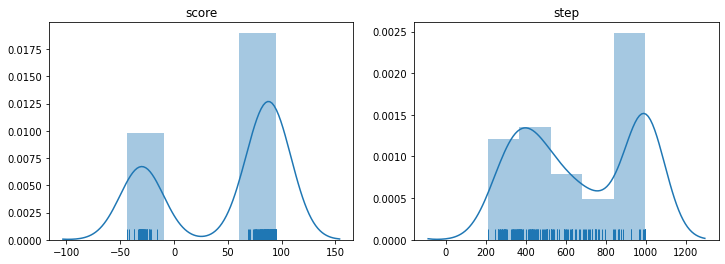

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].set_title('score')
ax[1].set_title('step')
sns.distplot(scores, rug=True, ax=ax[0])
sns.distplot(steps, rug=True, ax=ax[1])

print(np.mean(scores))

# ÌñâÎèôÎ∂ÑÌè¨ ÏãúÍ∞ÅÌôî 

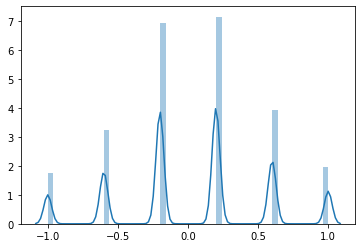

In [ ]:
sns.distplot(select_actions)

# Ïä§ÏΩîÏñ¥ Ï†êÏàò 

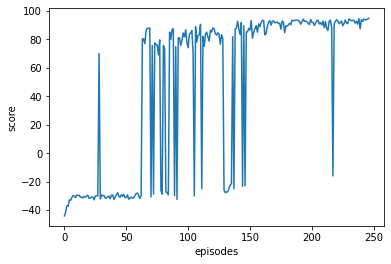

In [ ]:
plt.plot(scores)
plt.xlabel('episodes')
plt.ylabel('score')
plt.show()

# ÌÅêÌÖåÏù¥Î∏î ÏãúÍ∞ÅÌôî
* ÏÉÅÌïòÏ¢åÏö∞Ïùò -1Í∞íÏùÄ ÌÉêÏÉâÌïòÏßÄ Î™ªÌïú Î∂ÄÎ∂Ñ

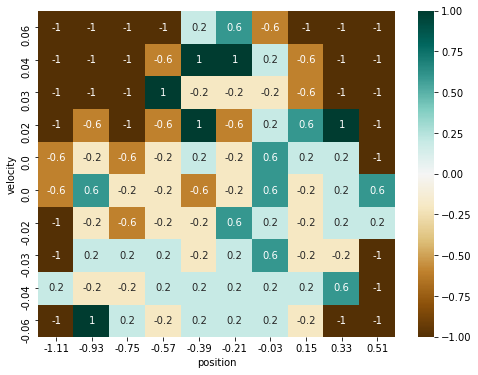

In [ ]:
q_values = []
for i in range(state_grid_count):
    q_values.append([])
    for j in range(state_grid_count):
        action_idx = np.argmax(q_table[i][j])
        q_values[i].append(actions[action_idx])

plt.figure(figsize=(8, 6))
ax = sns.heatmap(q_values, annot=True, cmap='BrBG')
ax.set_xlabel('position')
ax.set_ylabel('velocity')
xticks = env.observation_space.low[0] + range(state_grid_count+1) * abs((env.observation_space.high[0] - env.observation_space.low[0]) / state_grid_count)
xticks = [int((xticks[idx] + xticks[idx+1]) / 2 * 100) / 100 for idx, xtick in enumerate(xticks[:-1])]
ax.set_xticklabels(xticks)
yticks = env.observation_space.low[1] + range(state_grid_count+1) * abs((env.observation_space.high[1] - env.observation_space.low[1]) / state_grid_count)
yticks = [int((yticks[idx] + yticks[idx+1]) / 2 * 100) / 100 for idx, ytick in enumerate(yticks[:-1])]
ax.set_yticklabels(yticks)
ax.invert_yaxis()
plt.show()

# ÌÅê Îü¨Îãù ÌïôÏäµ Í≤∞Í≥º

In [ ]:
env.close()
env = wrap_env(gym.make('MountainCarContinuous-v0'))

score = 0
step = 0
previous_obs = env.reset()

while True:
    state_idx = obs_to_state(env, previous_obs)
    if random.random() < epsilon:
        action_idx = random.randint(0, action_grid_count-1)
        action = actions[action_idx]
    else:
        logits = q_table[state_idx[0]][state_idx[1]]
        action_idx = np.argmax(softmax(logits))
        action = actions[action_idx]

    obs, reward, done, info = env.step([action])
    previous_obs = obs
    score += reward
    step += 1
    
    if done:
        break

print('score:', score)
print('step:', step)
env.close()
show_video()

score: 90.32799957585334
step: 522
